In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv(r"C:\Users\Deniz\Desktop\data\data_csv.csv")
df

,code project,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%,Cost Estimation(milion_rials)
0,1,5.0,No way,Freeway,2,12.8,33-70 %,4027500.0
1,1,5.0,No way,Freeway,2,12.8,33-70 %,4027500.0
2,1,5.0,No way,Freeway,2,12.8,33-70 %,4027500.0
3,1,5.0,No way,Freeway,2,12.8,33-70 %,4027500.0
4,1,5.0,No way,Freeway,2,12.8,33-70 %,4027500.0
...,...,...,...,...,...,...,...,...
25325,539,5.0,No way,Mainroad,2,12.5,5-33 %,845000.0
25326,539,5.0,No way,Mainroad,2,12.5,5-33 %,845000.0
25327,539,5.0,No way,Mainroad,2,12.5,5-33 %,845000.0
25328,539,5.0,No way,Mainroad,2,12.5,5-33 %,845000.0


In [10]:
# df=pd.read_csv("/content/data_csv.csv")
# df

In [12]:
df_c=df.drop('code project',axis=1)

In [13]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25330 entries, 0 to 25329
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Length(km)                     25330 non-null  float64
 1   Type of road                   25330 non-null  object 
 2   constructed road Type          25330 non-null  object 
 3   Number Line                    25330 non-null  int64  
 4   width road(m)                  25330 non-null  float64
 5   slope land%                    25330 non-null  object 
 6   Cost Estimation(milion_rials)  25330 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ MB


In [14]:
df_c.isnull().sum()

Length(km)                       0
Type of road                     0
constructed road Type            0
Number Line                      0
width road(m)                    0
slope land%                      0
Cost Estimation(milion_rials)    0
dtype: int64

In [15]:
df_c.describe()

,Length(km),Number Line,width road(m),Cost Estimation(milion_rials)
count,25330.000000,25330.000000,25330.000000,2.533000e+04
mean,4.020994,1.259297,8.398423,5.865425e+05
std,1.431346,0.516036,2.920223,6.837286e+05
min,0.000107,0.000000,0.300000,5.882604e+00
25%,3.598371,1.000000,6.550000,2.623322e+05
50%,4.791322,1.000000,7.400000,4.192029e+05
75%,4.995176,2.000000,10.900000,6.495175e+05
max,5.000000,3.000000,17.150000,8.752500e+06


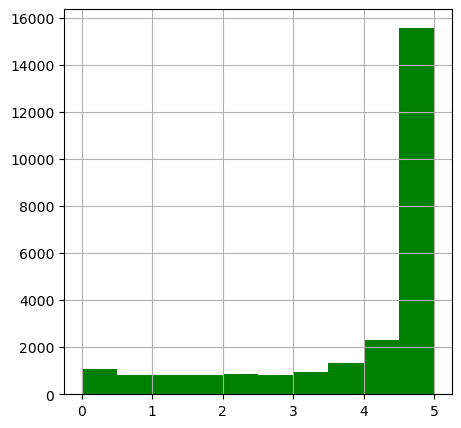

In [16]:
df_c['Length(km)'].hist(figsize=(5,5),xlabelsize=(10),color = 'green')
plt.show()

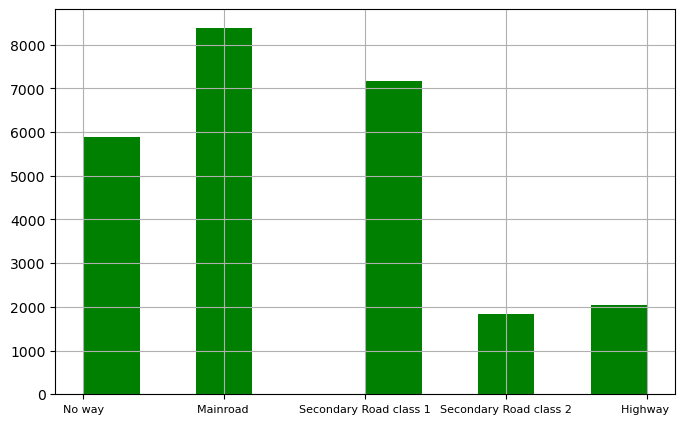

In [17]:
df_c['Type of road'].hist(figsize=(8,5),xlabelsize=(8),color = 'green')
plt.show()

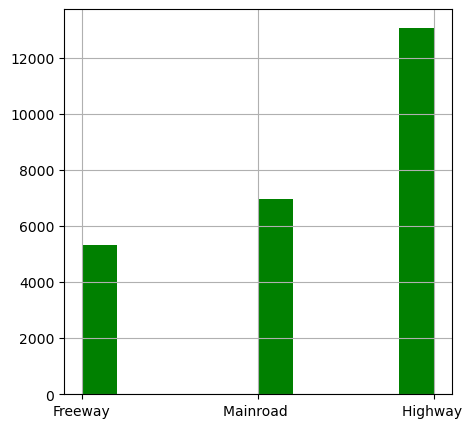

In [18]:
df_c['constructed road Type'].hist(figsize=(5,5),color = 'green')
plt.show()

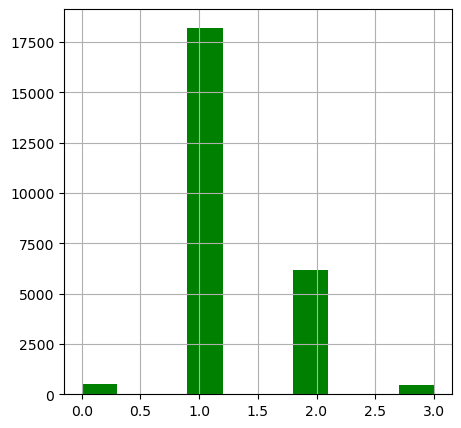

In [19]:
df_c["Number Line"].hist(figsize=(5,5),color = 'green')
plt.show()

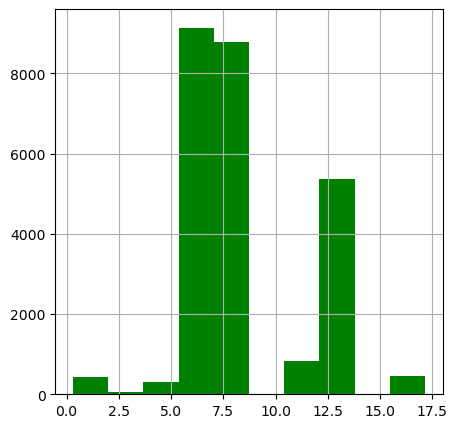

In [20]:
df_c["width road(m)"].hist(figsize=(5,5),color = 'green')
plt.show()

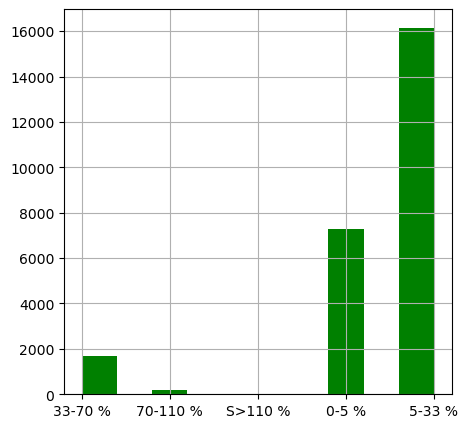

In [21]:
df_c["slope land%"].hist(figsize=(5,5),color = 'green')
plt.show()

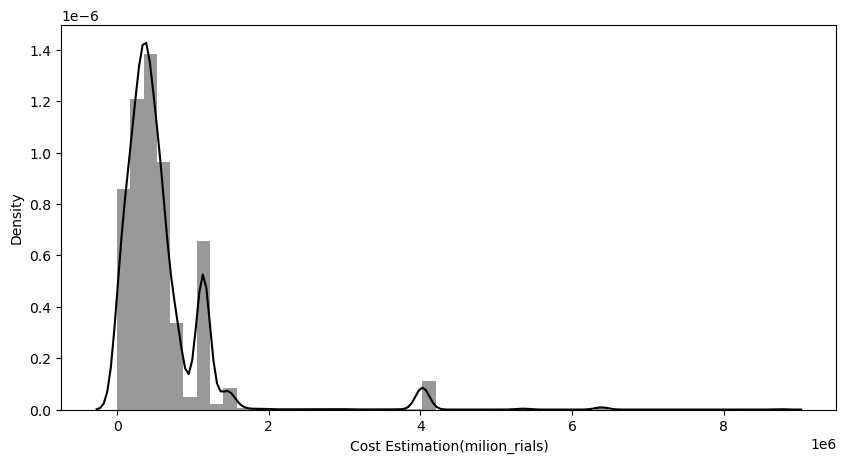

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(df_c['Cost Estimation(milion_rials)'], color='black');

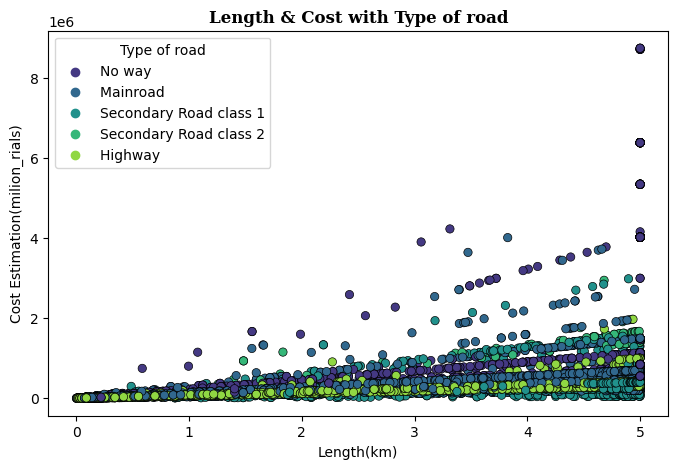

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['Length(km)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c["Type of road"] ,
                palette='viridis' , ec='k');
plt.title('Length & Cost with Type of road' , fontfamily='Serif' , fontweight='bold');

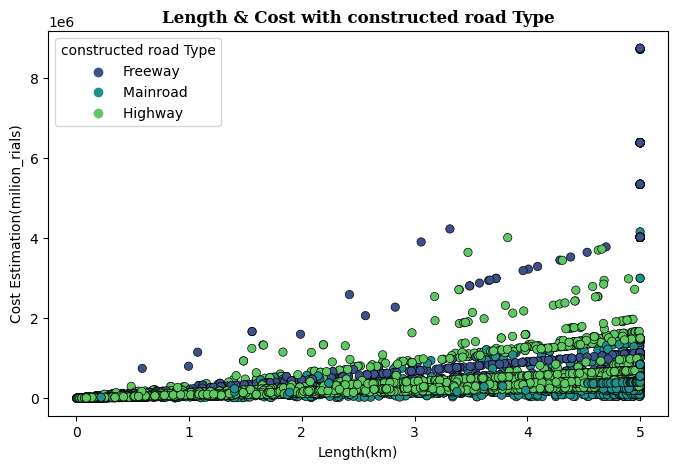

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['Length(km)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c['constructed road Type'] ,
                palette='viridis' , ec='k');
plt.title('Length & Cost with constructed road Type' , fontfamily='Serif' , fontweight='bold');

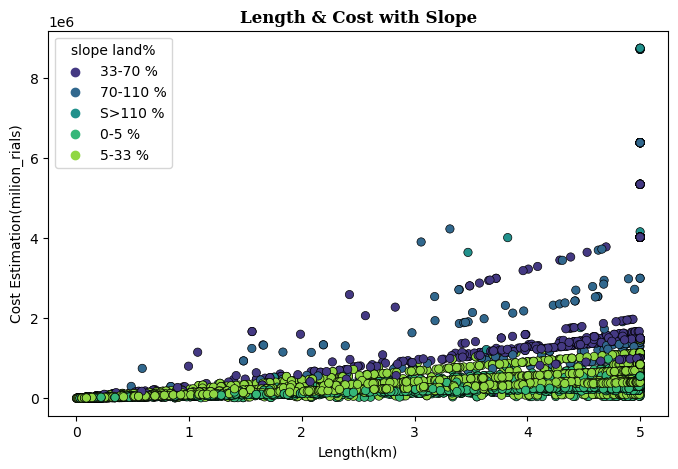

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['Length(km)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c['slope land%'] ,
                palette='viridis' , ec='k');
plt.title('Length & Cost with Slope' , fontfamily='Serif' , fontweight='bold');

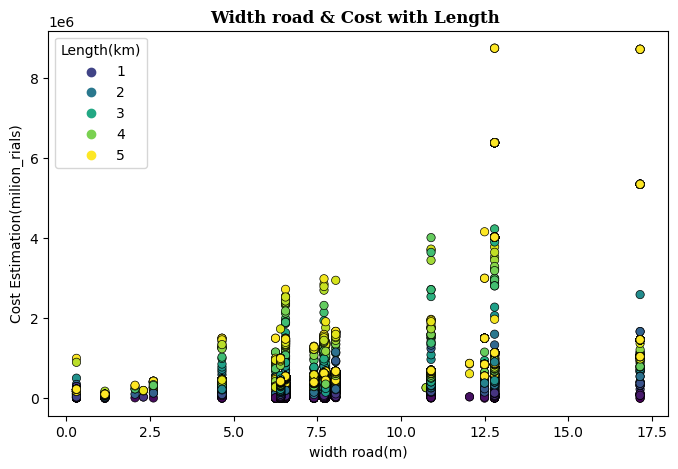

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['width road(m)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c['Length(km)'] ,
                palette='viridis' , ec='k');
plt.title('Width road & Cost with Length ' , fontfamily='Serif' , fontweight='bold');

<Figure size 800x500 with 0 Axes>

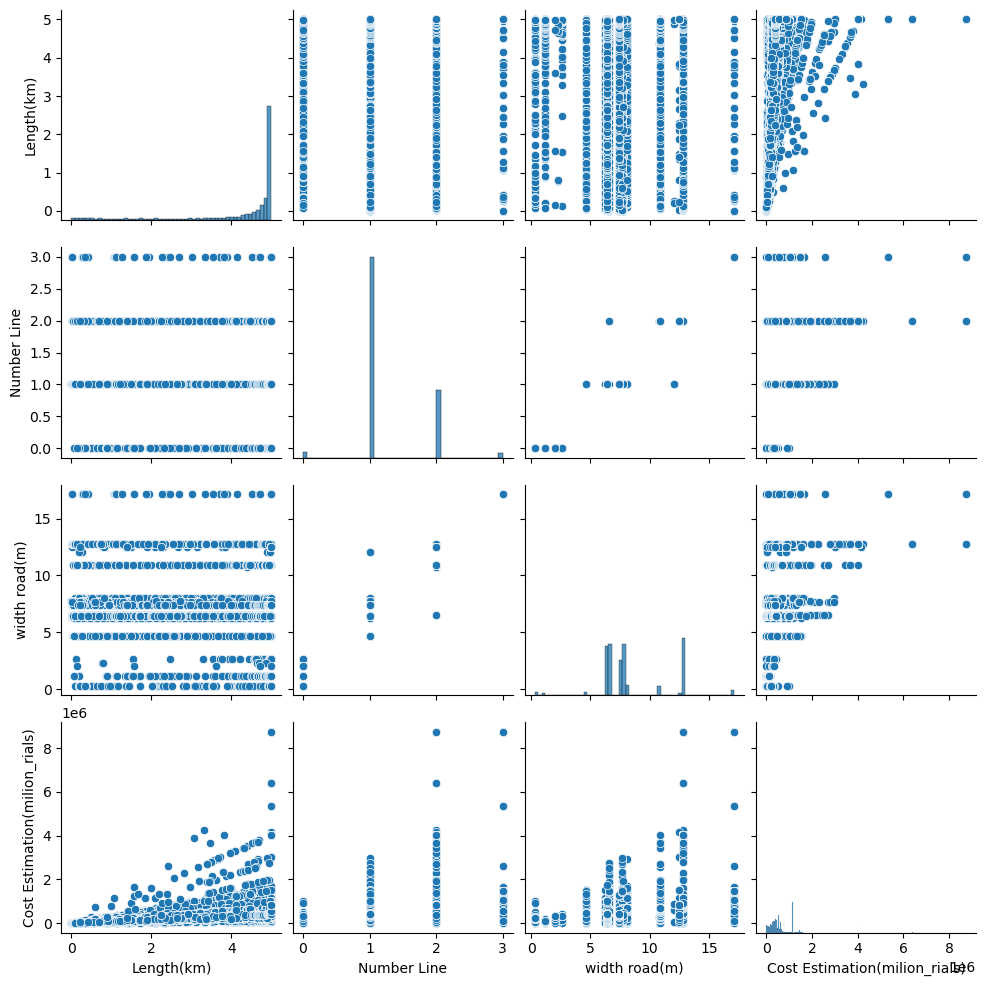

In [27]:
plt.figure(figsize=(8,5))
sns.pairplot(df_c)


In [28]:
df_c=df_c.drop_duplicates(subset="Cost Estimation(milion_rials)")
df_c

,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%,Cost Estimation(milion_rials)
0,5.000000,No way,Freeway,2,12.80,33-70 %,4.027500e+06
21,5.000000,No way,Freeway,3,17.15,33-70 %,5.351250e+06
31,5.000000,No way,Freeway,3,17.15,70-110 %,8.726250e+06
32,5.000000,No way,Mainroad,1,6.25,33-70 %,7.500000e+05
37,0.993974,No way,Freeway,2,12.80,33-70 %,8.006457e+05
...,...,...,...,...,...,...,...
25289,4.989205,Secondary Road class 1,Mainroad,1,7.40,5-33 %,3.991364e+05
25291,0.218490,No way,Mainroad,2,12.50,0-5 %,2.414313e+04
25292,1.401865,No way,Mainroad,2,12.50,0-5 %,1.549060e+05
25299,1.401865,No way,Mainroad,2,12.50,5-33 %,2.369151e+05


In [29]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
#catatt=['Type roadway','constructed road type','slope land%']


df_c['Type of road']=lb.fit_transform(df_c['Type of road'])

df_c['slope land%']=lb.fit_transform(df_c['slope land%'])

df_c['constructed road Type']=lb.fit_transform(df_c['constructed road Type'])

In [30]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
liNum=['Length(km)','width road(m)']
df_c[liNum]=sc.fit_transform(df_c[liNum])

df_c

,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%,Cost Estimation(milion_rials)
0,0.785386,2,0,2,3.142534,1,4.027500e+06
21,0.785386,2,0,3,5.582537,1,5.351250e+06
31,0.785386,2,0,3,5.582537,3,8.726250e+06
32,0.785386,2,2,1,-0.531495,1,7.500000e+05
37,-1.988066,2,0,2,3.142534,1,8.006457e+05
...,...,...,...,...,...,...,...
25289,0.777913,3,2,1,0.113564,2,3.991364e+05
25291,-2.524949,2,2,2,2.974258,0,2.414313e+04
25292,-1.705675,2,2,2,2.974258,0,1.549060e+05
25299,-1.705675,2,2,2,2.974258,2,2.369151e+05


In [31]:
df_c.corr()

,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%,Cost Estimation(milion_rials)
Length(km),1.000000,0.046291,-0.039390,-0.062648,-0.038772,-0.039243,0.491308
Type of road,0.046291,1.000000,0.267938,-0.109819,0.243848,0.030973,0.096394
constructed road Type,-0.039390,0.267938,1.000000,-0.306474,-0.269609,0.094945,-0.321909
Number Line,-0.062648,-0.109819,-0.306474,1.000000,0.910553,-0.014516,0.290326
width road(m),-0.038772,0.243848,-0.269609,0.910553,1.000000,-0.016396,0.329243
slope land%,-0.039243,0.030973,0.094945,-0.014516,-0.016396,1.000000,0.190408
Cost Estimation(milion_rials),0.491308,0.096394,-0.321909,0.290326,0.329243,0.190408,1.000000


<Axes: >

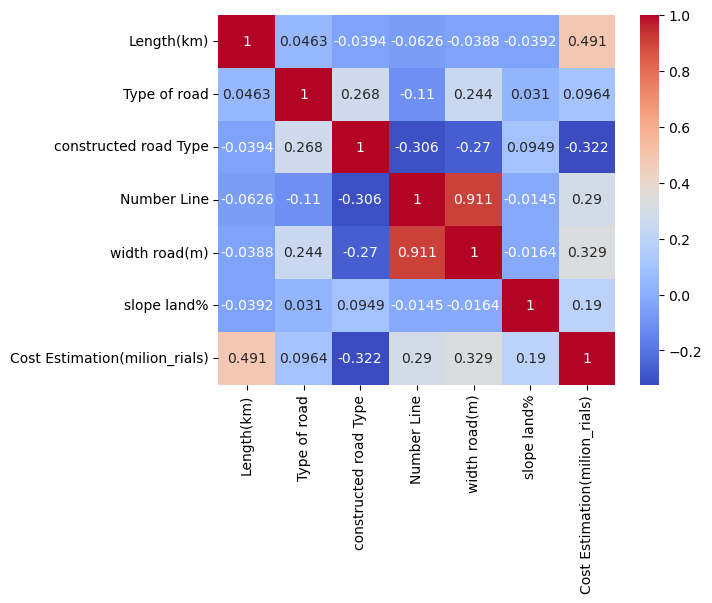

In [32]:
import seaborn as sns

sns.heatmap(df_c.corr(),cmap='coolwarm',annot=True,  linewidth=0,fmt='0.3g')

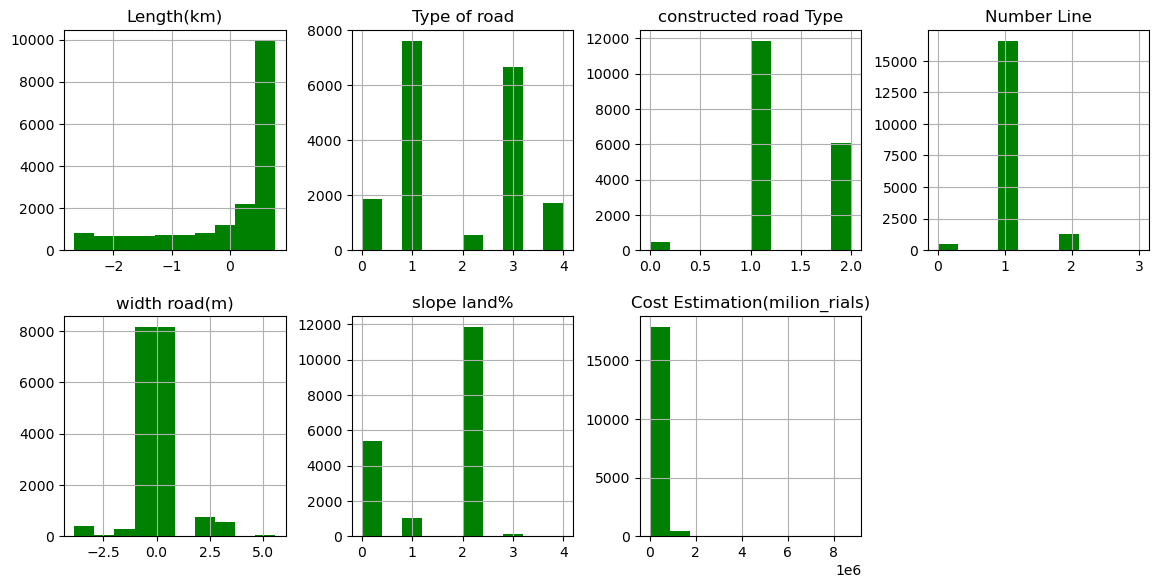

In [33]:
df_c.hist(figsize = (14,14), layout = (4,4), color = "green")
plt.show()

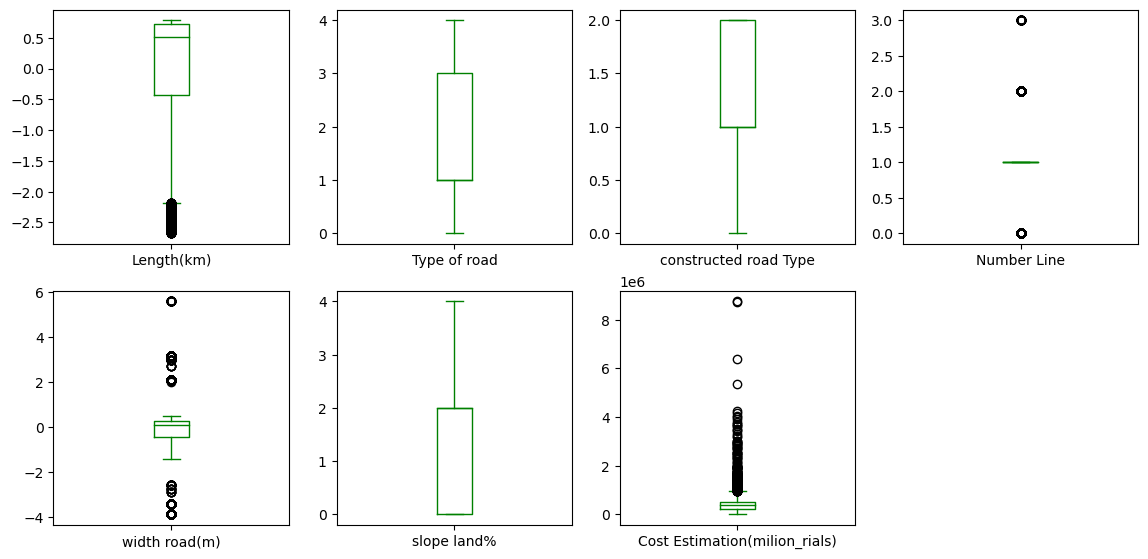

In [34]:
df_c.plot(kind='box',subplots=True,figsize = (14,14), layout = (4,4), color = "green")
plt.show()

In [35]:
Y = df_c['Cost Estimation(milion_rials)']

X = df_c.drop('Cost Estimation(milion_rials)',axis=1)
X.shape

(18395, 6)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc_Y = StandardScaler()
Y_c = sc_Y.fit_transform(np.array(Y).reshape(-1 , 1))
Y_c

array([[12.76723685],
       [17.41293663],
       [29.25749698],
       ...,
       [-0.82362915],
       [-0.53581833],
       [-0.03942739]])

In [37]:
#validation

from sklearn.model_selection import train_test_split

X_train,X_rest,Y_train,Y_rest=train_test_split(X,Y_c,test_size=0.3,
                                               random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, random_state=42)

In [38]:
X_test.shape

(2760, 6)

In [39]:
X_test

,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%
4257,-1.669017,1,1,1,-0.363218,2
13244,-0.711779,1,1,1,-0.363218,2
10908,-2.306526,1,1,1,-0.363218,0
12392,0.785044,4,1,1,0.478162,0
18269,-2.471145,3,1,1,0.281840,2
...,...,...,...,...,...,...
2377,0.760703,1,1,1,-0.363218,2
1347,0.502428,1,1,0,-3.868971,2
13095,-2.529135,1,2,1,-0.531495,0
10331,-2.267079,1,2,1,-0.531495,2


In [40]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):
    mae = metrics.mean_absolute_error(true, predicted)
    # mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("Training Result")
        print('MAE: ', mae)
        # print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("Testing Result")
        print('MAE: ', mae)
        # print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

# Linear Model

In [49]:
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()

model_1.fit(X_train,Y_train)

LinearRegression()

In [50]:
print(model_1.intercept_)
print(model_1.coef_)

[-0.82905421]
[[ 0.49561952  0.14707755 -0.57675676  0.89422891 -0.03288467  0.26177425]]


In [51]:
# predict and testing the trained liner model
y_train_pred = model_1.predict(X_train)
y_test_pred = model_1.predict(X_test)


print_evaluate(Y_train, y_train_pred, train=True)
print_evaluate(Y_test, y_test_pred, train=False)


Training Result
MAE:  0.2622482954564236
RMSE:  0.7362150402337511
R2 Square:  0.46809448897978845
Testing Result
MAE:  0.27539389180152296
RMSE:  0.7246930583580705
R2 Square:  0.46732957316781243


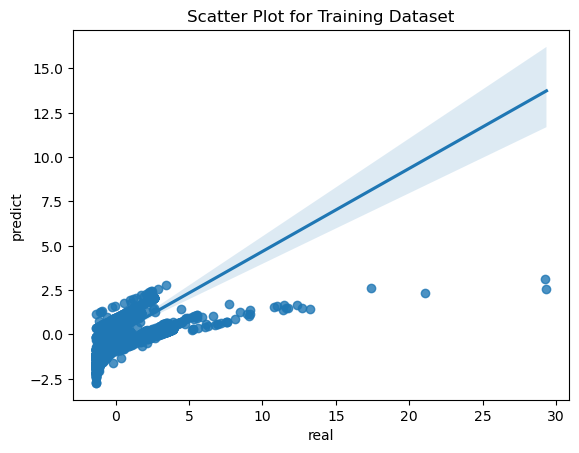

In [52]:
sns.regplot(x=Y_train, y= y_train_pred)

plt.xlabel("real")
plt.ylabel("predict")
plt.title("Scatter Plot for Training Dataset")
plt.show()

In [53]:
y_predict_test =pd.DataFrame(y_test_pred)
y_predict_train =pd.DataFrame(y_train_pred)
y_test = pd.DataFrame(Y_test)
y_train = pd.DataFrame(Y_train)
y_test

,0
0,-0.805649
1,-0.271883
2,-1.226720
3,0.211847
4,-1.237330
...,...
2755,0.549189
2756,-0.642181
2757,-1.337449
2758,-1.242833


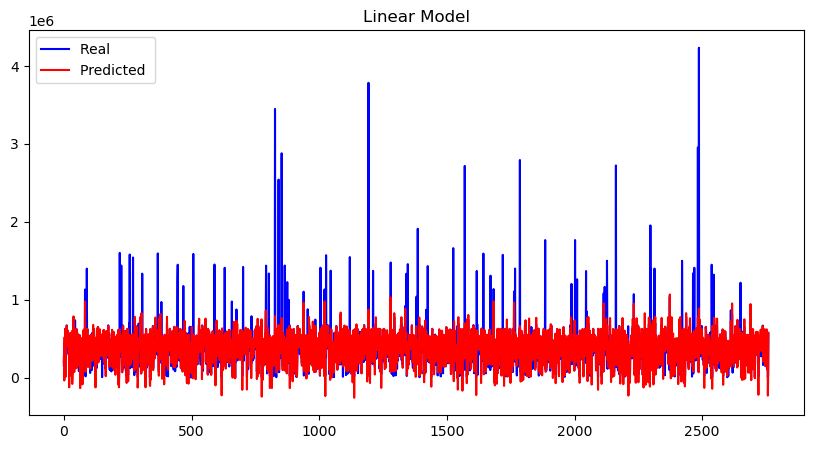

In [54]:
inv_y_test=sc_Y.inverse_transform(y_test)
inv_y_test_pred=sc_Y.inverse_transform(y_predict_test)
inv_y_train=sc_Y.inverse_transform(y_train)
inv_y_train_pred=sc_Y.inverse_transform(y_predict_train)

fig = plt.figure(figsize = (10,5))
plt.plot(inv_y_test, color='b', label='Real ')
plt.plot(inv_y_test_pred, color='r', label='Predicted ')
plt.legend()
plt.title("Linear Model")
plt.show()

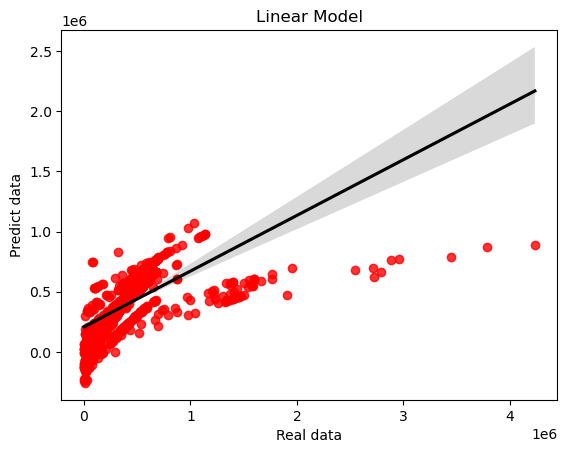

In [55]:
sns.regplot(x=inv_y_test, y= inv_y_test_pred,scatter_kws={'color': 'red'}, line_kws={'color': 'black'})
plt.xlabel("Real data")
plt.ylabel("Predict data")
plt.title("Linear Model")
plt.show()

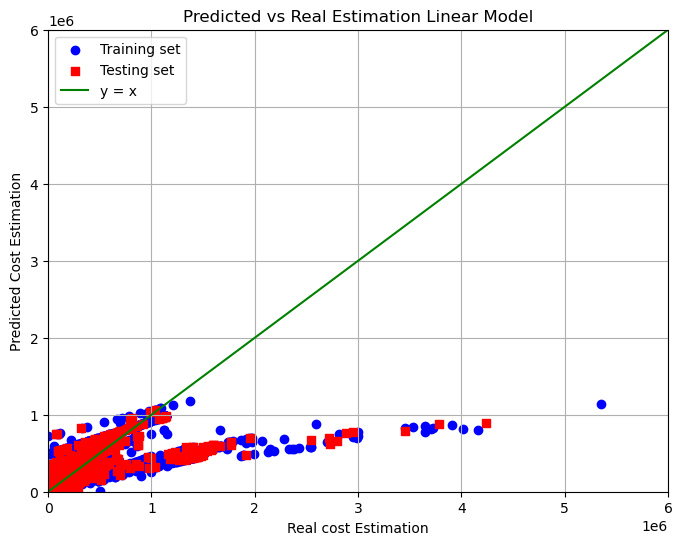

In [56]:
import matplotlib.pyplot as plt
import numpy as np


# ایجاد نمودار
plt.figure(figsize=(8, 6))

# داده‌های آموزش
plt.scatter(inv_y_train,inv_y_train_pred , color='blue', label='Training set', marker='o')

# داده‌های تست
plt.scatter(inv_y_test,inv_y_test_pred, color='red', label='Testing set', marker='s')

# خط y = x
x = np.linspace(min(Y), max(Y), 100)
plt.plot(x, x, color='green', label='y = x')

# تنظیمات نمودار
plt.xlabel('Real cost Estimation')
plt.ylabel('Predicted Cost Estimation')
plt.legend()
plt.grid(True)
plt.xlim(0, 6000000)
plt.ylim(0,6000000 )
plt.title('Predicted vs Real Estimation Linear Model')

# نمایش نمودار
plt.show()
